## Raw Data
Using Emotiv headsets, we have access to multiple data output formats, including: csv, edf, edf+, bdf, etc. EDF+ files have become the defacto for EEG data.  They are more memory efficient than CSV files, allowing faster computations with less resources, and they include categories for all of the raw data from our Emotiv eeg headset. 

In order to begin working with our data, we must import it!  We have several methods available.  Let's start with the most simple example, we'll open one file and plot the raw data:

Extracting EDF parameters from r:\FINAL_EDF_REPO\EDF_analysis\EDF+\254362\254362.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Using matplotlib as 2D backend.


C:\Users\Admin\AppData\Local\Temp\ipykernel_6696\1552237316.py:4: RuntimeWarning: Loading an EDF with mixed sampling frequencies and preload=False will result in edge artifacts. It is recommended to use preload=True.See also https://github.com/mne-tools/mne-python/issues/10635
  raw.plot(block=True) #Block must be True if working interactively with a .py file


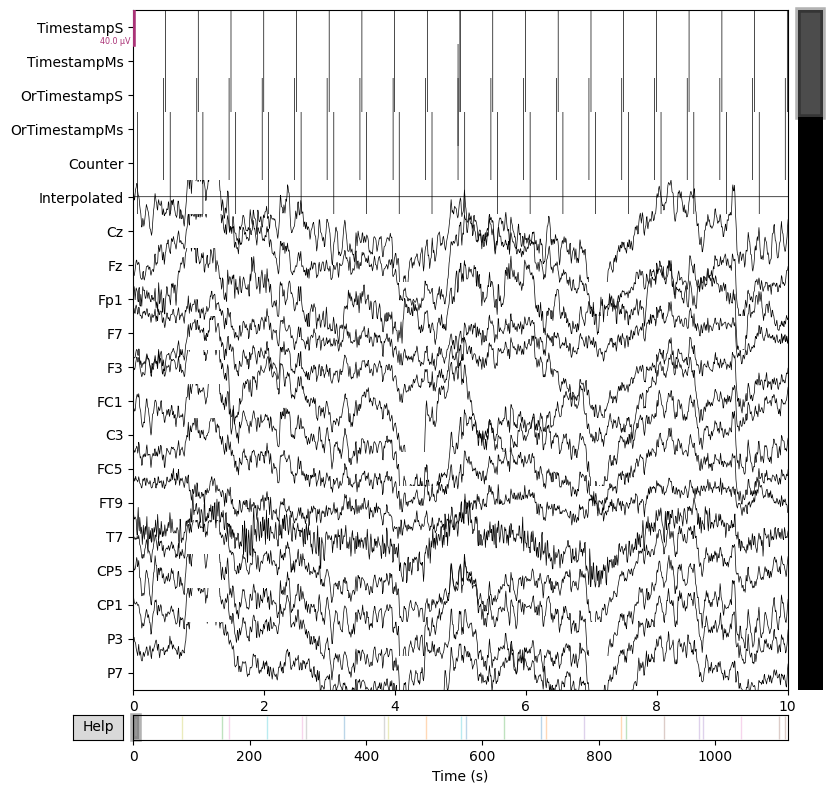

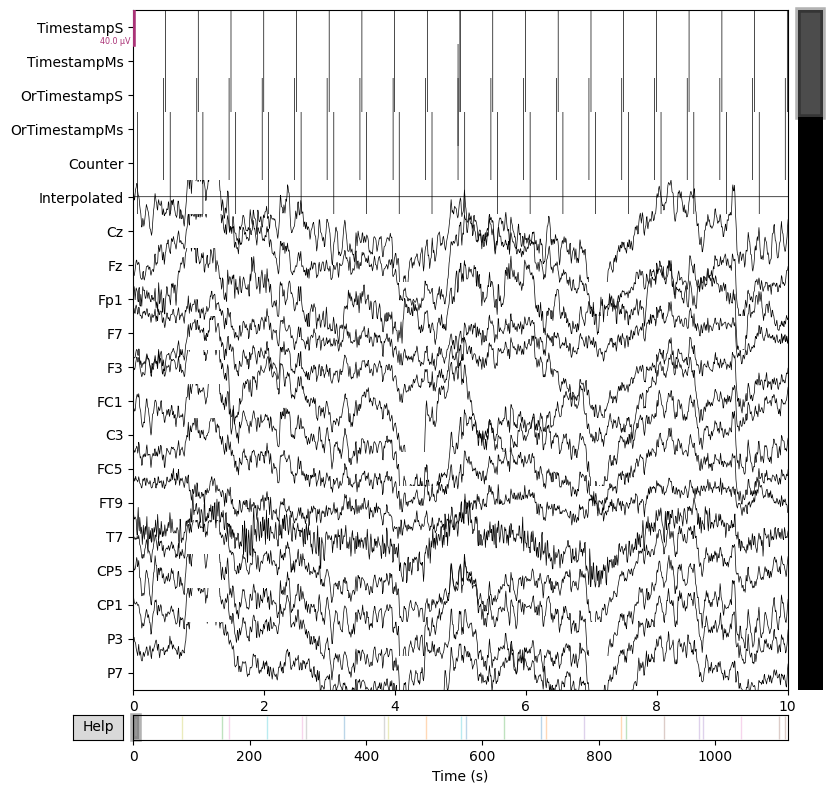

In [2]:
import mne

raw = mne.io.read_raw_edf(r'EDF+\254362\254362.edf') # raw = mne.io.read_raw_edf(r'EDF+\103918\103918.edf', eog=['fp1', 'fp2'], preload=True, infer_types=True)
raw.plot(block=True) #Block must be True if working interactively with a .py file

## Refining the data on import
We can see that the above plots all of the data!  Helpful to understand what we're dealing with.  We can see that we're plotting data which does not correspond to eeg electrode locations!  We can work with the data more closely upon input and help mne sort out the data

Extracting EDF parameters from r:\FINAL_EDF_REPO\EDF_analysis\EDF+\254362\254362.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 143999  =      0.000 ...  1124.992 secs...


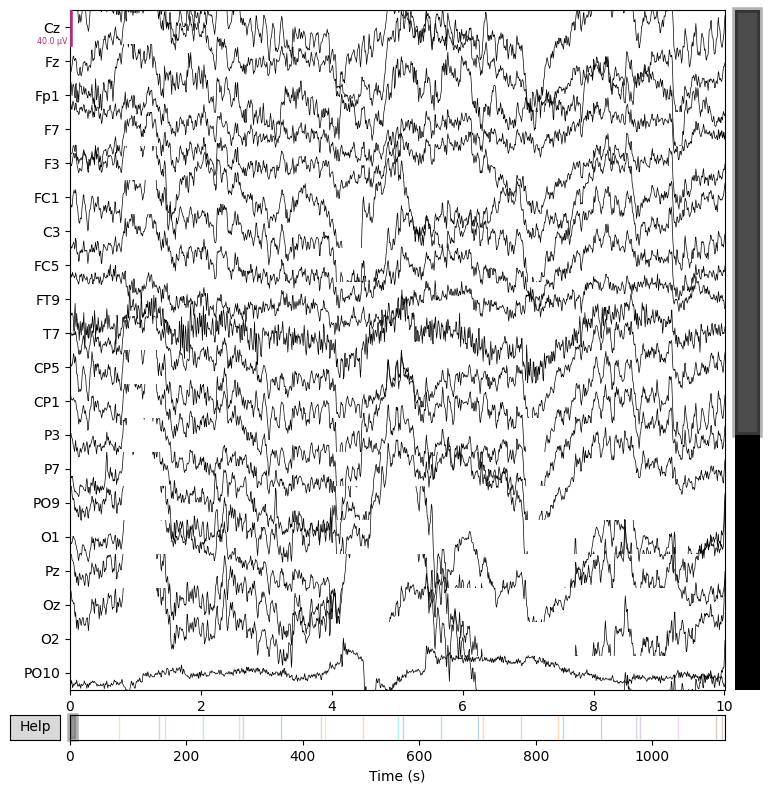

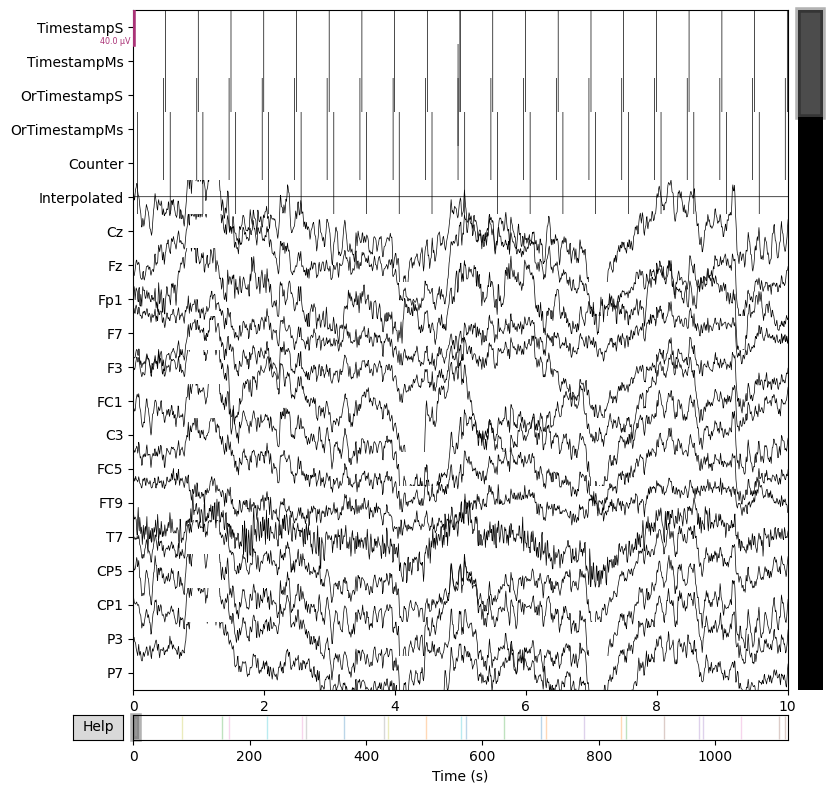

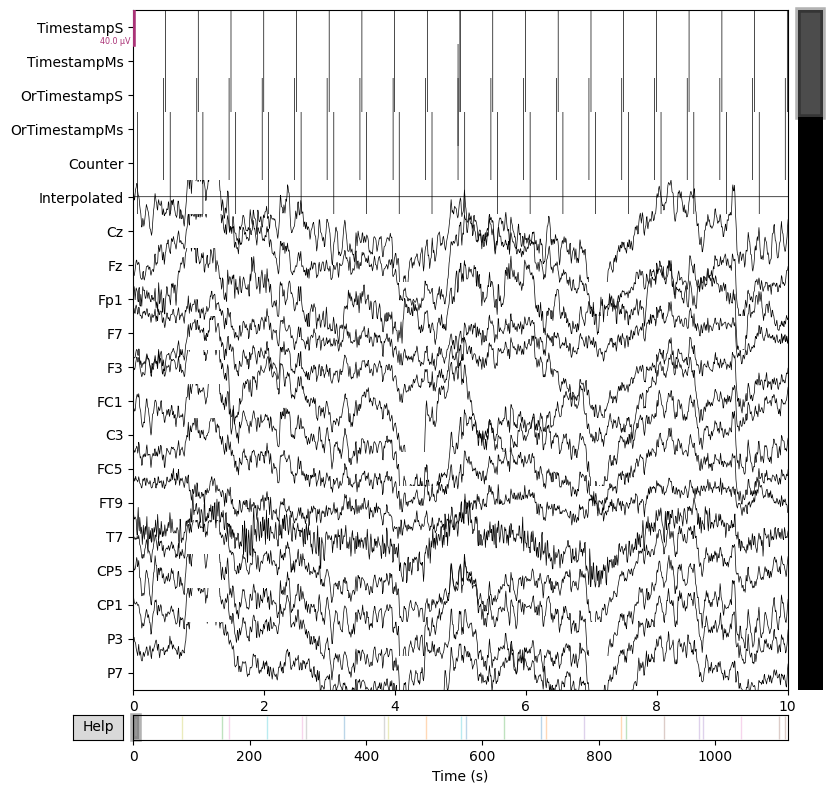

In [3]:
import mne

# Define eeg channels for when we need to pass them explicitly as arguments
eeg_channels = ['Cz', 'Fz', 'Fp1', 'F7', 'F3', 'FC1', 'C3', 'FC5', 'FT9', 'T7', 'CP5', 'CP1', 'P3', 'P7', 'PO9', 'O1', 'Pz', 'Oz', 'O2', 'PO10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'FT10', 'FC6', 'C4', 'FC2', 'F4', 'F8', 'Fp2']
eog_channels=['Fp1', 'Fp2']


#raw = mne.io.read_raw_edf(r'EDF+\103918\103918.edf', eog=['Fp1', 'Fp2'], preload=True, infer_types=True) ##NOTE: YOU MUST watch the capitalization!
raw = mne.io.read_raw_edf(
    r'EDF+\254362\254362.edf',
    #eog=['Fp1', 'Fp2'], ###NOTE: YOU MUST watch the capitalization!Define eog channels!  In the future, I suggest trying making a copy of these as eog1 and eog2
    misc=None, # List of channel names to be considered as miscellaneous (MISC) channels.
    stim_channel=None,  # Set to None if you don't have a stim channel
    exclude=[],  # Exclude channels you don't want
    preload=True,  # Preload data into memory to speed things up
    infer_types=True,  # Infer channel types from names
    verbose=True  # Set verbosity / output messages
    )

raw.pick('eeg') # Pick only eeg related data!  However, we still have more data then we need!  We'll plot only the channels we want
raw.plot(picks=eeg_channels, block=True) #Block must be True if working interactively with a .py file.  Also, we are picking only eeg channels

raw.pick('eeg').plot(block=True) # Pick only eeg related data!  However, we still have more data then we need!  We'll plot only the channels we want
# raw #Block must be True if working interactively with a .py file.  Also, we are picking only eeg channels

After importing the data we can move to preprocessing and filtering.
[Go to pre-processing](2_pre_processing.ipynb)